In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
import scipy
from celluloid import Camera

import Classroom


Bad key "text.kerning_factor" on line 4 in
/Users/tylerkeeling/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


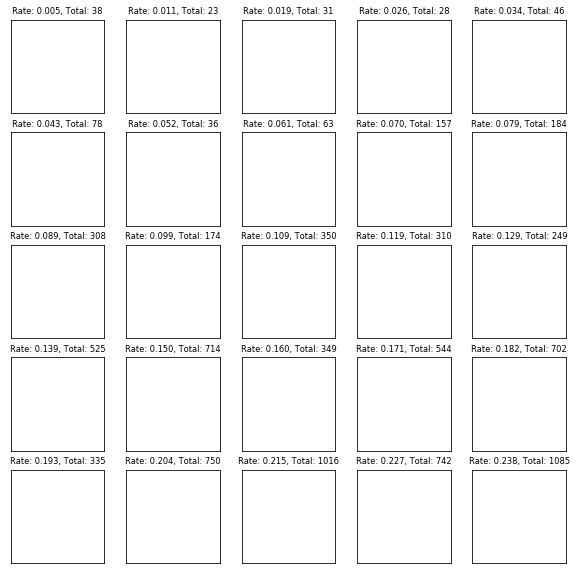

In [4]:
ROWS = 5
COLS = 5

def plot_image(img, title):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.title(title, fontsize='small')

def plot_grid(heatmaps, num_cols, num_rows):
    
    for i in range(0, num_rows*num_cols, num_cols):
        for j in range(num_cols):
            plt.subplot(num_rows, num_cols, i+j+1) # 1 indexed
            plot_image(heatmaps[i+j].arr, "Rate: {0:0.3f}, Total: {1}".format(heatmaps[i+j].rate, heatmaps[i+j].total_infected))
        # plt.tight_layout()
    return plt

classlist = []
for i in range(ROWS*COLS):
    classlist.append(Classroom.classroom(64,64,0.005*(i+1)**1.2,1))

fig = plt.figure(figsize=(2*COLS, 2*ROWS))
camera = Camera(fig)
for i in range(30):
    p = plot_grid(classlist, COLS, ROWS)
    camera.snap()
    for c in classlist:
        c.iterate()

    
animation = camera.animate()
animation.save('multi.gif', writer = 'imagemagick', fps=30)


#### Was hoping below would be faster by using "blit" flag but this is raising an error. Interesting. 
https://stackoverflow.com/questions/33742845/how-to-animate-a-seaborns-heatmap-or-correlation-matrix

Good reminder that one should avoid premature optimization when you have a goal and what you have works!! 
It's a trap

import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def animate_heat_map():
    fig = plt.figure()

    nx = ny = 20
    data = np.random.rand(nx, ny)
    ax = sns.heatmap(data, vmin=0, vmax=1)

    def init():
        plt.clf()
        ax = sns.heatmap(data, vmin=0, vmax=1)

    def animate(i):
        plt.clf()
        data = np.random.rand(nx, ny)
        ax = sns.heatmap(data, vmin=0, vmax=1)

    anim = animation.FuncAnimation(fig, animate, init_func=init, interval=1000)
    anim.save('double_pendulum.gif', fps=15)
    plt.show()


if __name__ == "__main__":
    animate_heat_map()